<table align="left" width=100%>
    <tr>
        <td width="10%">
            <img src="title.png">
        </td>
        <td>
            <div align="left">
                <font color="#21618C" size=8px>
                  <b>Customer churn prediction
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement
For Telco companies it is a key to attract new customers and at the same time avoid contract terminations(=churn) to grow their revenue generating base. Looking at churn, different reasons trigger customers to terminate their contracts, for example better price offers, more interesting packages, bad service experiences or change of customers’ personal situations.Telcos apply machine learning models to predict churn on an individual customer basis and take counter measures such as discounts, special offers or other gratifications to keep their customers. A customer churn analysis is a typical classification problem within the domain of supervised learning.



## Data Definition

**Churn**: Whether the customer churned or not (Yes or No)(Target variable)

**PhoneService**: Whether the customer has a phone service (Yes, No)

**MultipleLines**: Whether the customer has multiple lines (Yes, No, No phone service)

**InternetService**: Customer’s internet service provider (DSL, Fiber optic, No)

**OnlineSecurity**: Whether the customer has online security (Yes, No, No internet service)

**OnlineBackup**: Whether the customer has online backup (Yes, No, No internet service)

**DeviceProtection**: Whether the customer has device protection (Yes, No, No internet service)

**TechSupport**: Whether the customer has tech support (Yes, No, No internet service)

**StreamingTV**: Whether the customer has streaming TV (Yes, No, No internet service)

**StreamingMovies**: Whether the customer has streaming movies (Yes, No, No internet service)

**Tenure**: Number of months the customer has stayed with the company (Numerical)

**Contract**: The contract term of the customer (Month-to-month, One year, Two year)

**PaperlessBilling**: Whether the customer has paperless billing (Yes, No)

**PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer(automatic), Credit card(automatic))

**MonthlyCharges**: The amount charged to the customer monthly

**TotalCharges**: The total amount charged to the customer

**customerID**: Customer ID

**Gender**: Whether the customer is a male or a female

**SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)

**Partner**: Whether the customer has a partner or not (Yes, No)

**Dependents**: Whether the customer has dependents or not (Yes, No)

## Table of Content

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#Read)**
4. **[Data Analysis and Preparation](#data_preparation)**
    - 4.1.1 - **[Dimensions of the data](#Dimension)**
    - 4.1.2 - **[Check the data types](#Data_types)**
    - 4.1.2 - **[Summary Statistics](#Summary_Statistics)**
    - 4.1.3 - **[Distribution of Variables](#distribution_variables)**
    - 4.1.4 - **[Correlation](#correlation)**
    - 4.1.5 - **[Discover Outliers](#outliers)**
    - 4.1.6 - **[Missing Values](#Missing_Values)**      
    - 4.2 - **[Prepare the Data](#Data_Preparation)**
5. **[Model Building](#mod_build)**
    - 5.1 - **[Decision Tree](#DecisionTreeWFS)**
    - 5.2 - **[Prune a Decision Tree](#DecisionTreePruning)**
    - 5.3 - **[Decision Tree (using GridSearchCV)](#DecisionTreewithGridSearchCv)**
6. **[Conclusion and Interpretation](#conclusion)**

<a id='import_lib'></a>
# 1. Import Libraries

In [73]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# import 'is_string_dtype' to check if the type of input is string  
from pandas.api.types import is_string_dtype

# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree



# import functions to perform logistic regression
import statsmodels
import statsmodels.api as sm

# import functions to plot the decision tree
import pydotplus
from IPython.display import Image  

plt.rcParams['figure.figsize'] = [15,8]

In [2]:
! pip install pydotplus

In [3]:
! pip install graphviz

<a id='set_options'></a>
# 2. Set Options

In [72]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

<a id='Read'></a>
# 3. Read Data

In [74]:
oschdir=(r'C:\Users\User\Downloads\sukanya\Imarticus project 1')
data=pd.read_csv('Telecom customer churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<a id='Data_Understanding'></a>
## 4. Data analysis and preparation

<a id='Dimension'></a>
#### 4.1.1 Dimensions of the data

In [6]:
data.shape

(7043, 21)

<a id='Data_types'></a>
#### 4.1.2 Check the data types

In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### From the above output, we observe that
1.**'SeniorCitizen'** and **'tenure'** are of **integer** type, **'MonthlyCharges'** as **float** and all other features are of **object** type.
2.Also 'TotalCharges' are interpreted as object type

In [8]:
#Checking the values in 'TotalCharges'
data['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
data['MonthlyCharges'].values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

#### From the above code it is observed that observations in 'TotalCharges' are in string type.

In [10]:
#let's convert 'TotalCharges' into numeric.
#errors='coerce'- will ignore the errors and assigns na

data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')


#converting 'tenure' as float
#data['tenure']= data['tenure'].astype('float')

In [11]:
#rechecking data types

data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<a id='checkinfo'></a>
## 4. Checking information of the data

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
#creating a copy of base data for manipulation and processing

data1= data.copy()

In [15]:
data1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
data1.loc[data1['TotalCharges'].isnull()== True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


## Missing value treatment

In [17]:
#Sorting values on the basis of null values
Total = data1.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
TotalCharges,11,0.156183
customerID,0,0.000000
DeviceProtection,0,0.000000
MonthlyCharges,0,0.000000
PaymentMethod,0,0.000000
PaperlessBilling,0,0.000000
Contract,0,0.000000
StreamingMovies,0,0.000000
StreamingTV,0,0.000000
TechSupport,0,0.000000


Since the percentage of missing value is low, let's replace it with 0(we can also use mean or mode as it is numerical variable. 

In [18]:
no_null_data=data1.fillna(0)

In [19]:
#rechecking the missing values
no_null_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
data2= no_null_data.copy(deep=True)

We observe that there are no further missing values.

## Summary statistics

In [21]:
#For numerical variables, use the describe()
data2.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [22]:
#For categorical variables, say include=object
data2.describe(include= 'object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [23]:
#Dropping the column which is not needed for prediction
data2.drop(columns= ['customerID'], axis=1, inplace=True)

In [24]:
data2.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [25]:
data2.shape

(7043, 20)

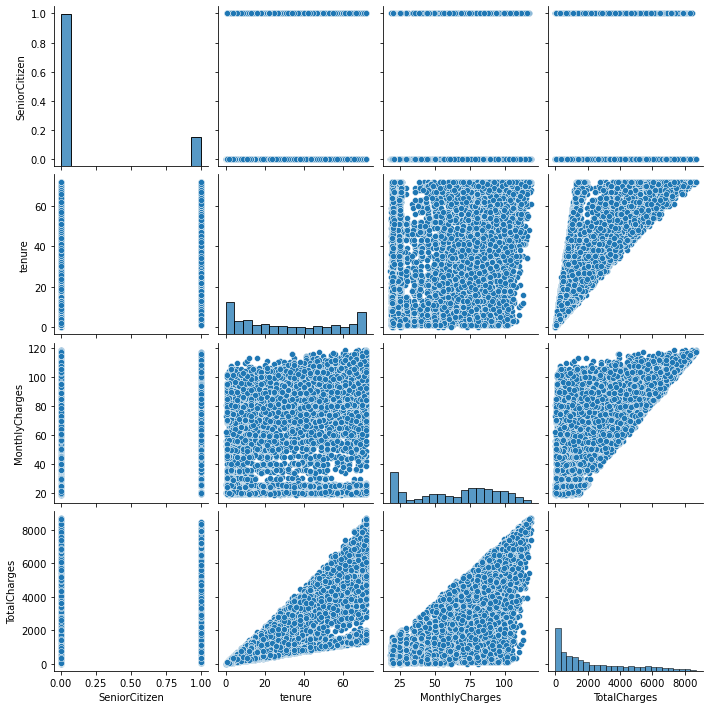

In [26]:
sns.pairplot(data2)

<AxesSubplot:>

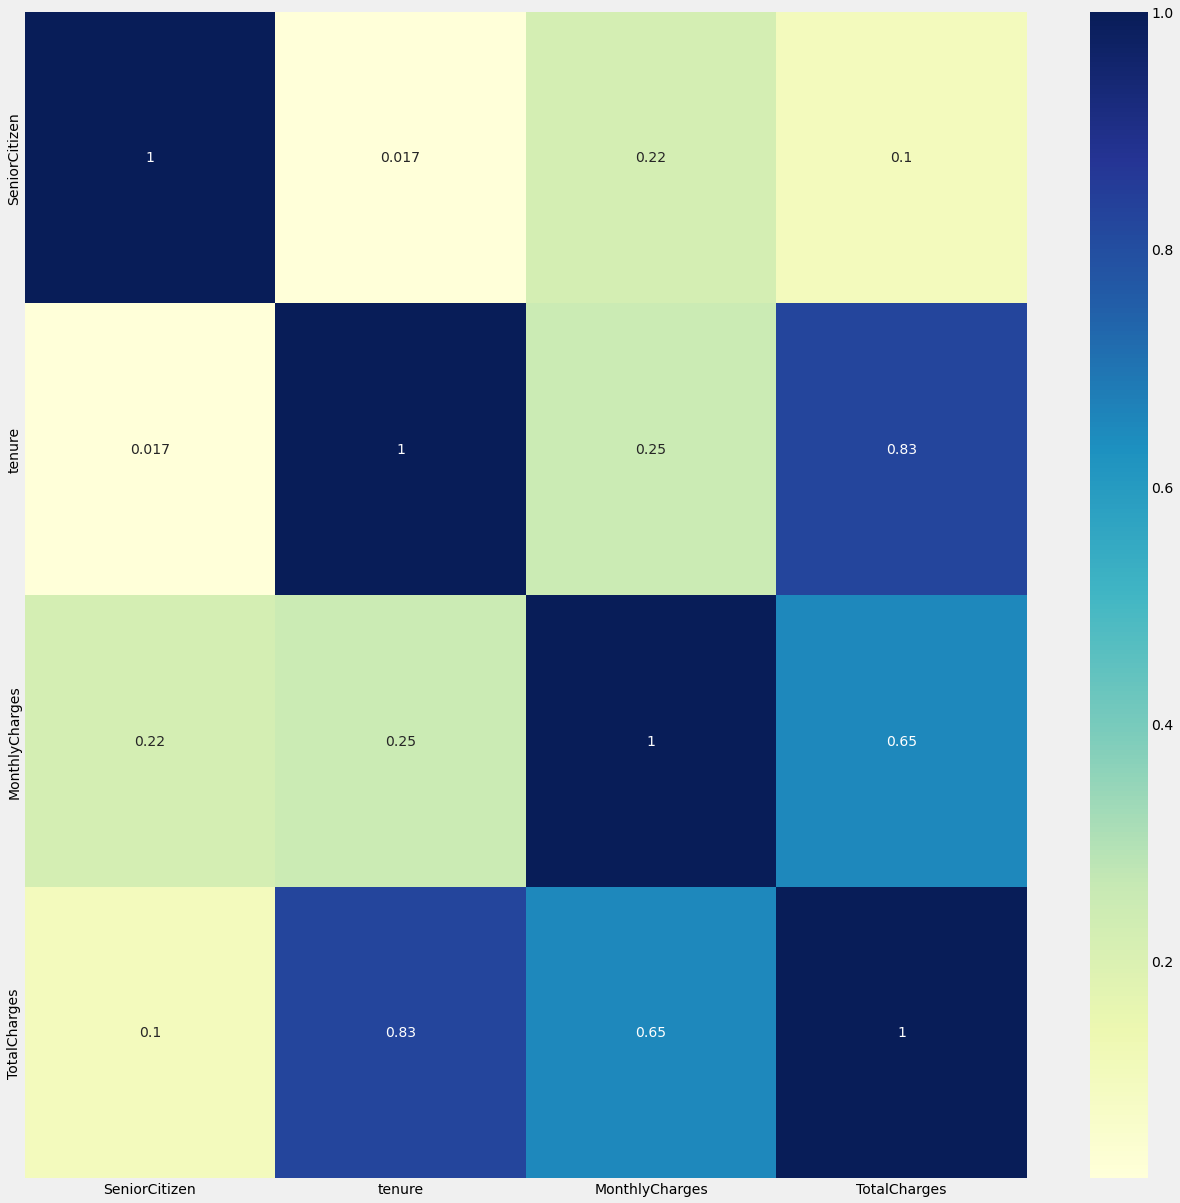

In [27]:
#plotting correlation matrix for numerical variables
import matplotlib.style as style
style.use('fivethirtyeight')
plt.figure(figsize=(20,20))
sns.heatmap(data2.corr(), cmap="YlGnBu", annot=True)

From the above matrix,

## EDA

In [28]:
class_frequency = data2.Churn.value_counts()
class_frequency

No     5174
Yes    1869
Name: Churn, dtype: int64

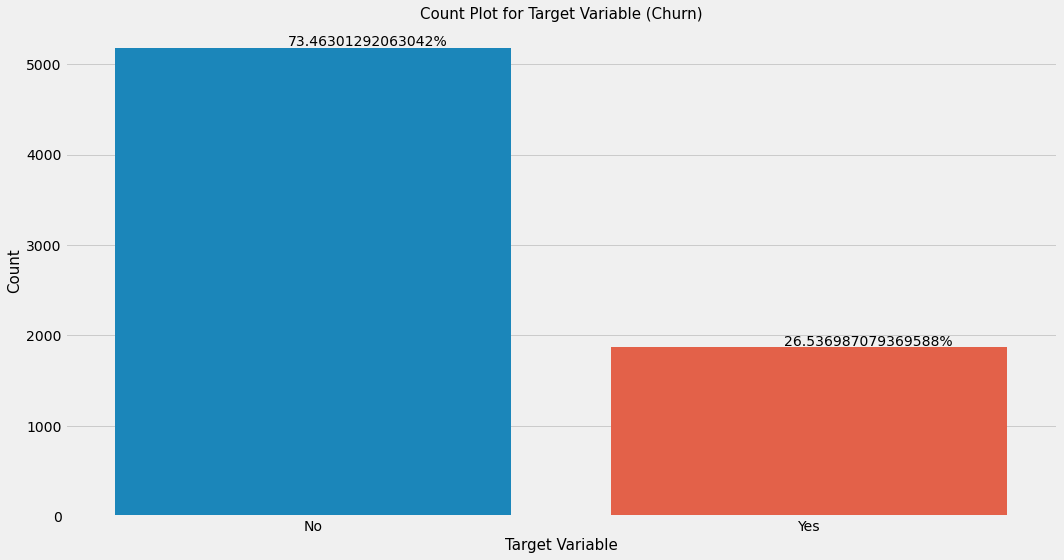

In [29]:
sns.countplot(x = data2['Churn'])

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text on the plot
plt.text(x = -0.05, y = data2['Churn'].value_counts()[0] + 30, s = str((class_frequency[0])*100/len(data2['Churn'])) + '%')
plt.text(x = 0.95, y =data2['Churn'].value_counts()[1] +20, s = str((class_frequency[1])*100/len(data2['Churn'])) + '%')

# adding plot and axes labels
# setting text size using 'fontsize'
plt.title('Count Plot for Target Variable (Churn)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.tight_layout()
# to show the plot
plt.show()


### There are a total of 5163 customers who do not churn, and 1869 customers are likely to terminate from the service.We see that the data set is imbalanced between the two classes of the target variable.

**Univariate Analysis**

#### 1.Distribution of independent categorical variables by churn.

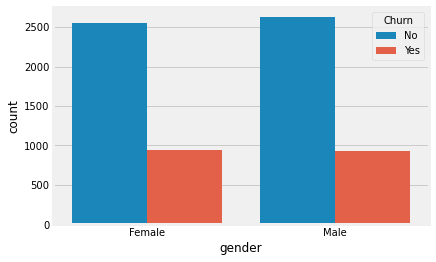

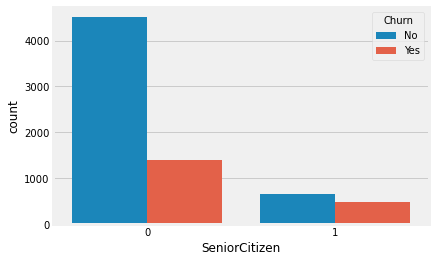

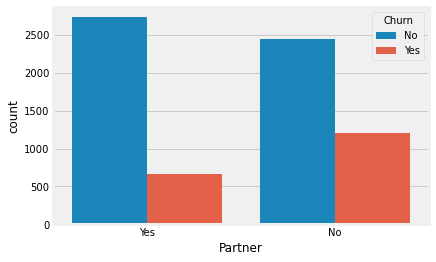

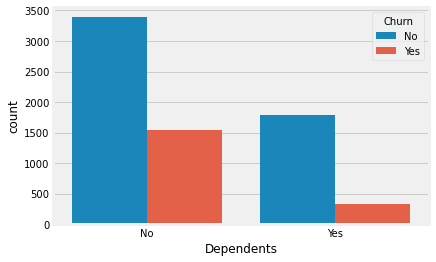

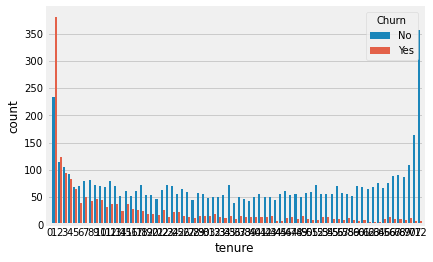

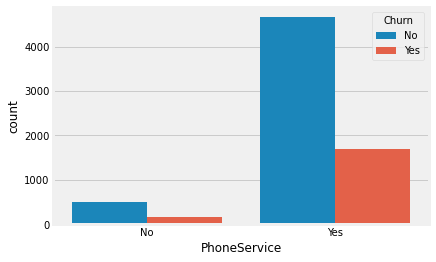

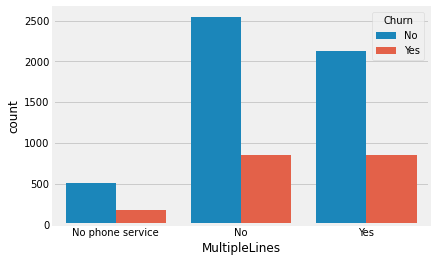

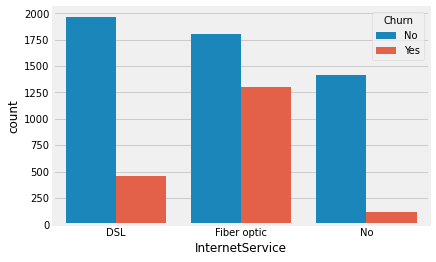

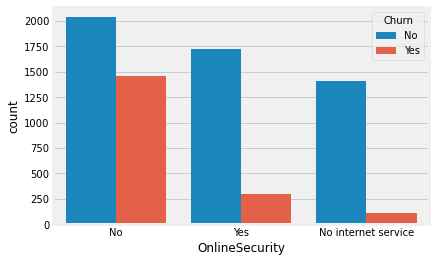

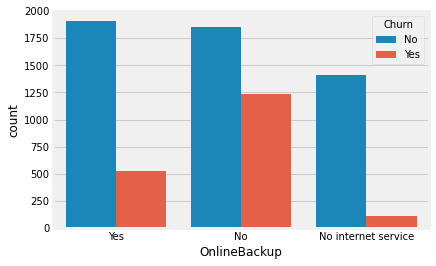

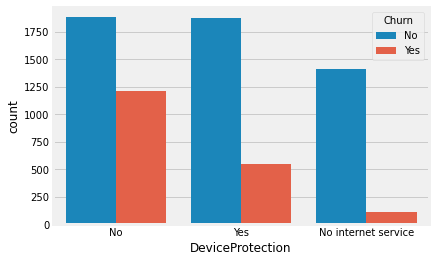

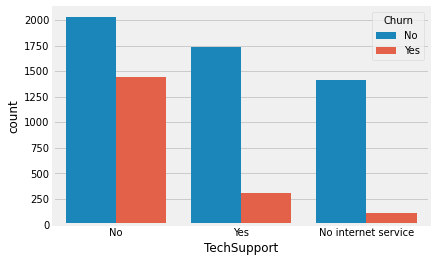

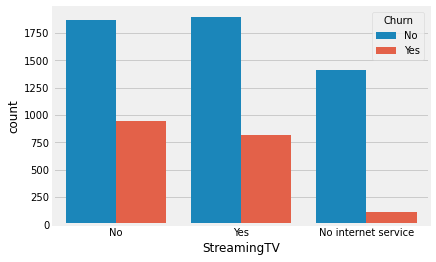

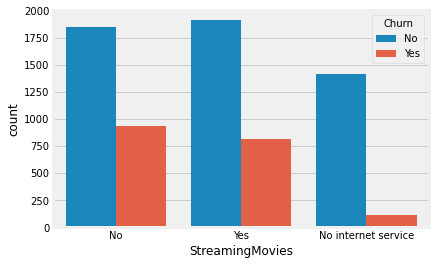

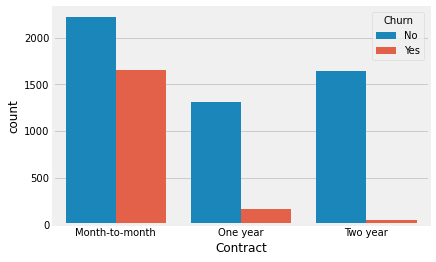

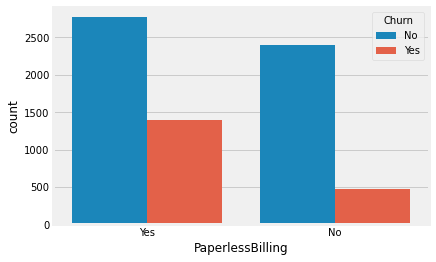

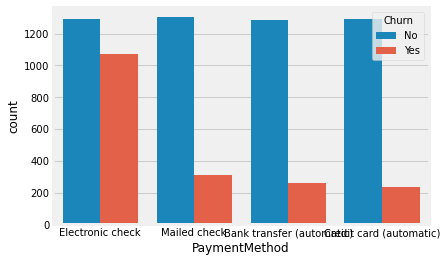

In [30]:
%matplotlib inline
for i, predictor in enumerate(data2.drop(columns=['Churn','MonthlyCharges','TotalCharges'])):
    plt.figure(i)
    sns.countplot(data=data1, x=predictor, hue='Churn')
plt.tight_layout
plt.show()
    
    
    
    


#### Bivariate analysis

#### 

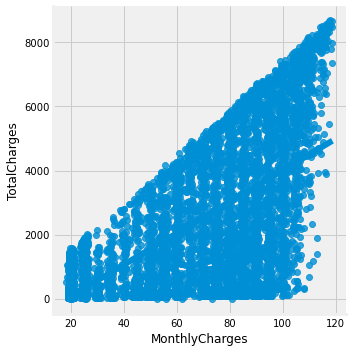

In [31]:
sns.lmplot(data=data2, x='MonthlyCharges', y='TotalCharges')

#### We observe that 'Total Charges' increase as 'Monthly Charges' increase-as expected.



Let's build a correlation of all predictors with the target variable.

#Data cleaning
Before doing label encoding, let us check the unique values present in each column

In [32]:
#using for loop to iterate through columns 
#using python f string to see what columns
for column in data2:
    print(f'{column} : {data2[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [33]:
#printing columns which are only object type 
def print_unique_values_columns(data2):
    for column in data2:
        if data2[column].dtypes=='object':
            print(f'{column} : {data[column].unique()}')

In [34]:
#calling the function
print_unique_values_columns(data2)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


lets replace no internet service, no phone service with No as well.


In [35]:
data2.replace('No phone service','No', inplace=True)   #inplace=True- modifies the current dataframe
data2.replace('No internet service','No', inplace=True)

In [36]:
print_unique_values_columns(data2)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [37]:
#creating an array
yes_no_cols=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn','gender']

for col in yes_no_cols:
    data2[col].replace({'Yes': 1, 'No':0, 'Female':1, 'Male':0},inplace=True)
                
                

In [38]:
data2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
664,1,0,1,1,57,1,0,No,0,0,0,0,0,0,Two year,0,Bank transfer (automatic),19.50,1167.60,0
6962,1,1,1,0,27,1,0,Fiber optic,1,0,1,0,1,1,Month-to-month,1,Electronic check,101.25,2754.45,1
3637,0,0,0,0,9,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,20.25,178.50,1
1025,1,1,1,0,60,1,0,Fiber optic,1,1,1,1,1,1,Two year,1,Bank transfer (automatic),110.00,6668.35,0


Label encoding

In [39]:
data2_dummies= pd.get_dummies(data=data2, columns=['InternetService','Contract','PaymentMethod'])

In [40]:
data2_dummies.sample(6)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3239,0,0,0,0,16,1,0,0,0,0,1,0,0,1,49.45,799.00,0,1,0,0,1,0,0,0,0,0,1
2301,1,0,1,0,8,1,1,0,0,0,1,0,1,1,90.25,743.75,0,0,1,0,1,0,0,0,0,1,0
540,1,0,1,1,72,1,1,1,1,1,1,1,1,1,113.10,8248.50,0,0,1,0,0,0,1,1,0,0,0
768,0,0,0,0,41,1,0,0,0,0,1,0,0,1,74.25,3089.10,0,0,1,0,1,0,0,0,0,1,0
4718,1,0,1,0,20,1,0,0,0,0,0,0,0,1,20.00,416.45,0,0,0,1,0,1,0,0,0,0,1
3924,1,0,1,1,48,1,1,0,0,0,0,0,1,1,82.05,4029.95,1,0,1,0,0,1,0,0,0,0,1


Now the data looks good with all the features in integer type.
We observe that the range of the data is not scaled.

Let's build a correlation of all predictors with the target variable.

In [41]:
new_data= data2_dummies.corr()
new_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,0.001874,0.001808,-0.010517,-0.005106,0.006488,0.008414,0.017021,0.013773,0.002105,0.009212,0.008393,0.010487,0.011754,0.014569,0.000080,0.008612,-0.006568,0.011286,-0.006026,0.003386,-0.008026,0.003695,0.016024,-0.001215,-0.000752,-0.013744
SeniorCitizen,0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,0.156530,0.220173,0.103006,0.150889,-0.108322,0.255338,-0.182742,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477
Partner,0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,-0.014877,0.096848,0.317504,-0.150448,-0.000851,0.000304,0.000615,-0.280865,0.082783,0.248091,0.110706,0.082029,-0.083852,-0.095125
Dependents,-0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,-0.111377,-0.113890,0.062078,-0.164221,0.052010,-0.165818,0.139812,-0.231720,0.068368,0.204613,0.052021,0.060267,-0.150642,0.059071
tenure,-0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.006152,0.247900,0.826178,-0.352229,0.013274,0.019720,-0.039062,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852
PhoneService,0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.016505,0.247398,0.113214,0.011942,-0.452425,0.289999,0.172209,-0.000742,-0.002791,0.003519,0.007556,-0.007721,0.003062,-0.003319
MultipleLines,0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.163530,0.490434,0.468504,0.040102,-0.199920,0.366083,-0.210564,-0.088203,-0.003794,0.106253,0.075527,0.060048,0.083618,-0.227206
OnlineSecurity,0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,-0.003636,0.296594,0.411651,-0.171226,0.321269,-0.030696,-0.333403,-0.246679,0.100162,0.191773,0.095158,0.115721,-0.112338,-0.080798
OnlineBackup,0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.126735,0.441780,0.509226,-0.082255,0.157884,0.165651,-0.381593,-0.164172,0.083722,0.111400,0.087004,0.090785,-0.000408,-0.174164
DeviceProtection,0.002105,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.103797,0.482692,0.521983,-0.066160,0.146291,0.176049,-0.380754,-0.225662,0.102495,0.165096,0.083115,0.111554,-0.003351,-0.187373


### Let's build a correlation of all predictors with the target variable

<AxesSubplot:>

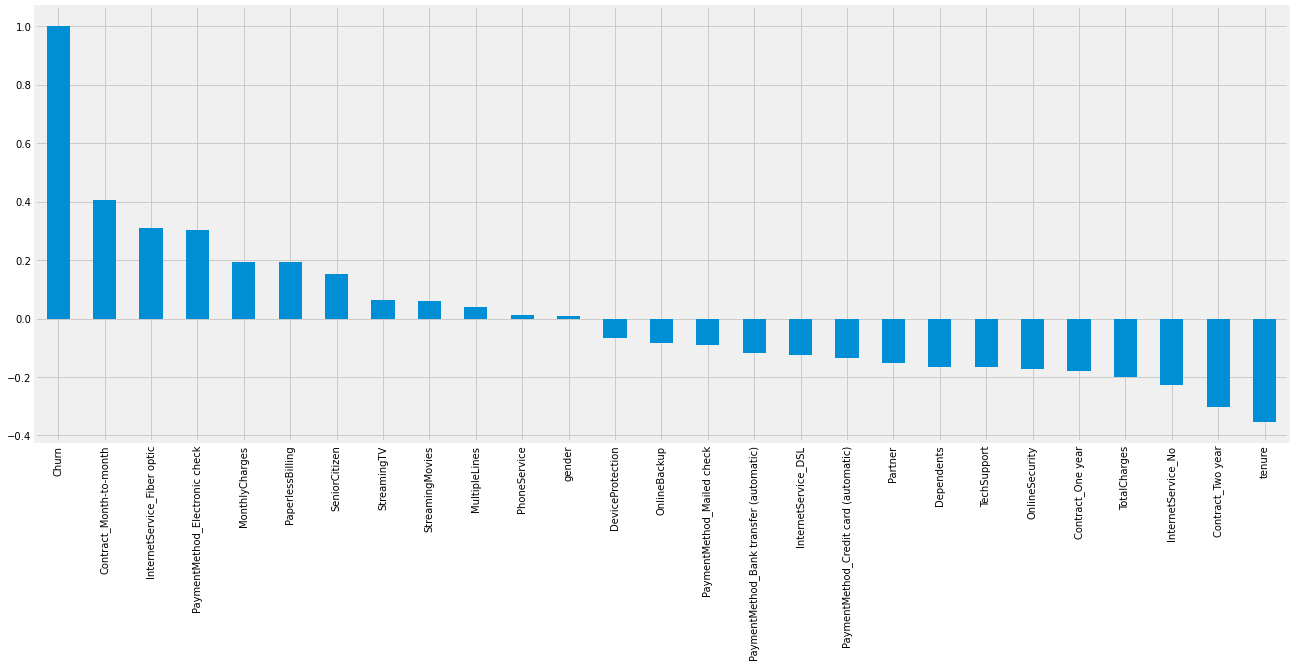

In [42]:
plt.figure(figsize=(20,8))
data2_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

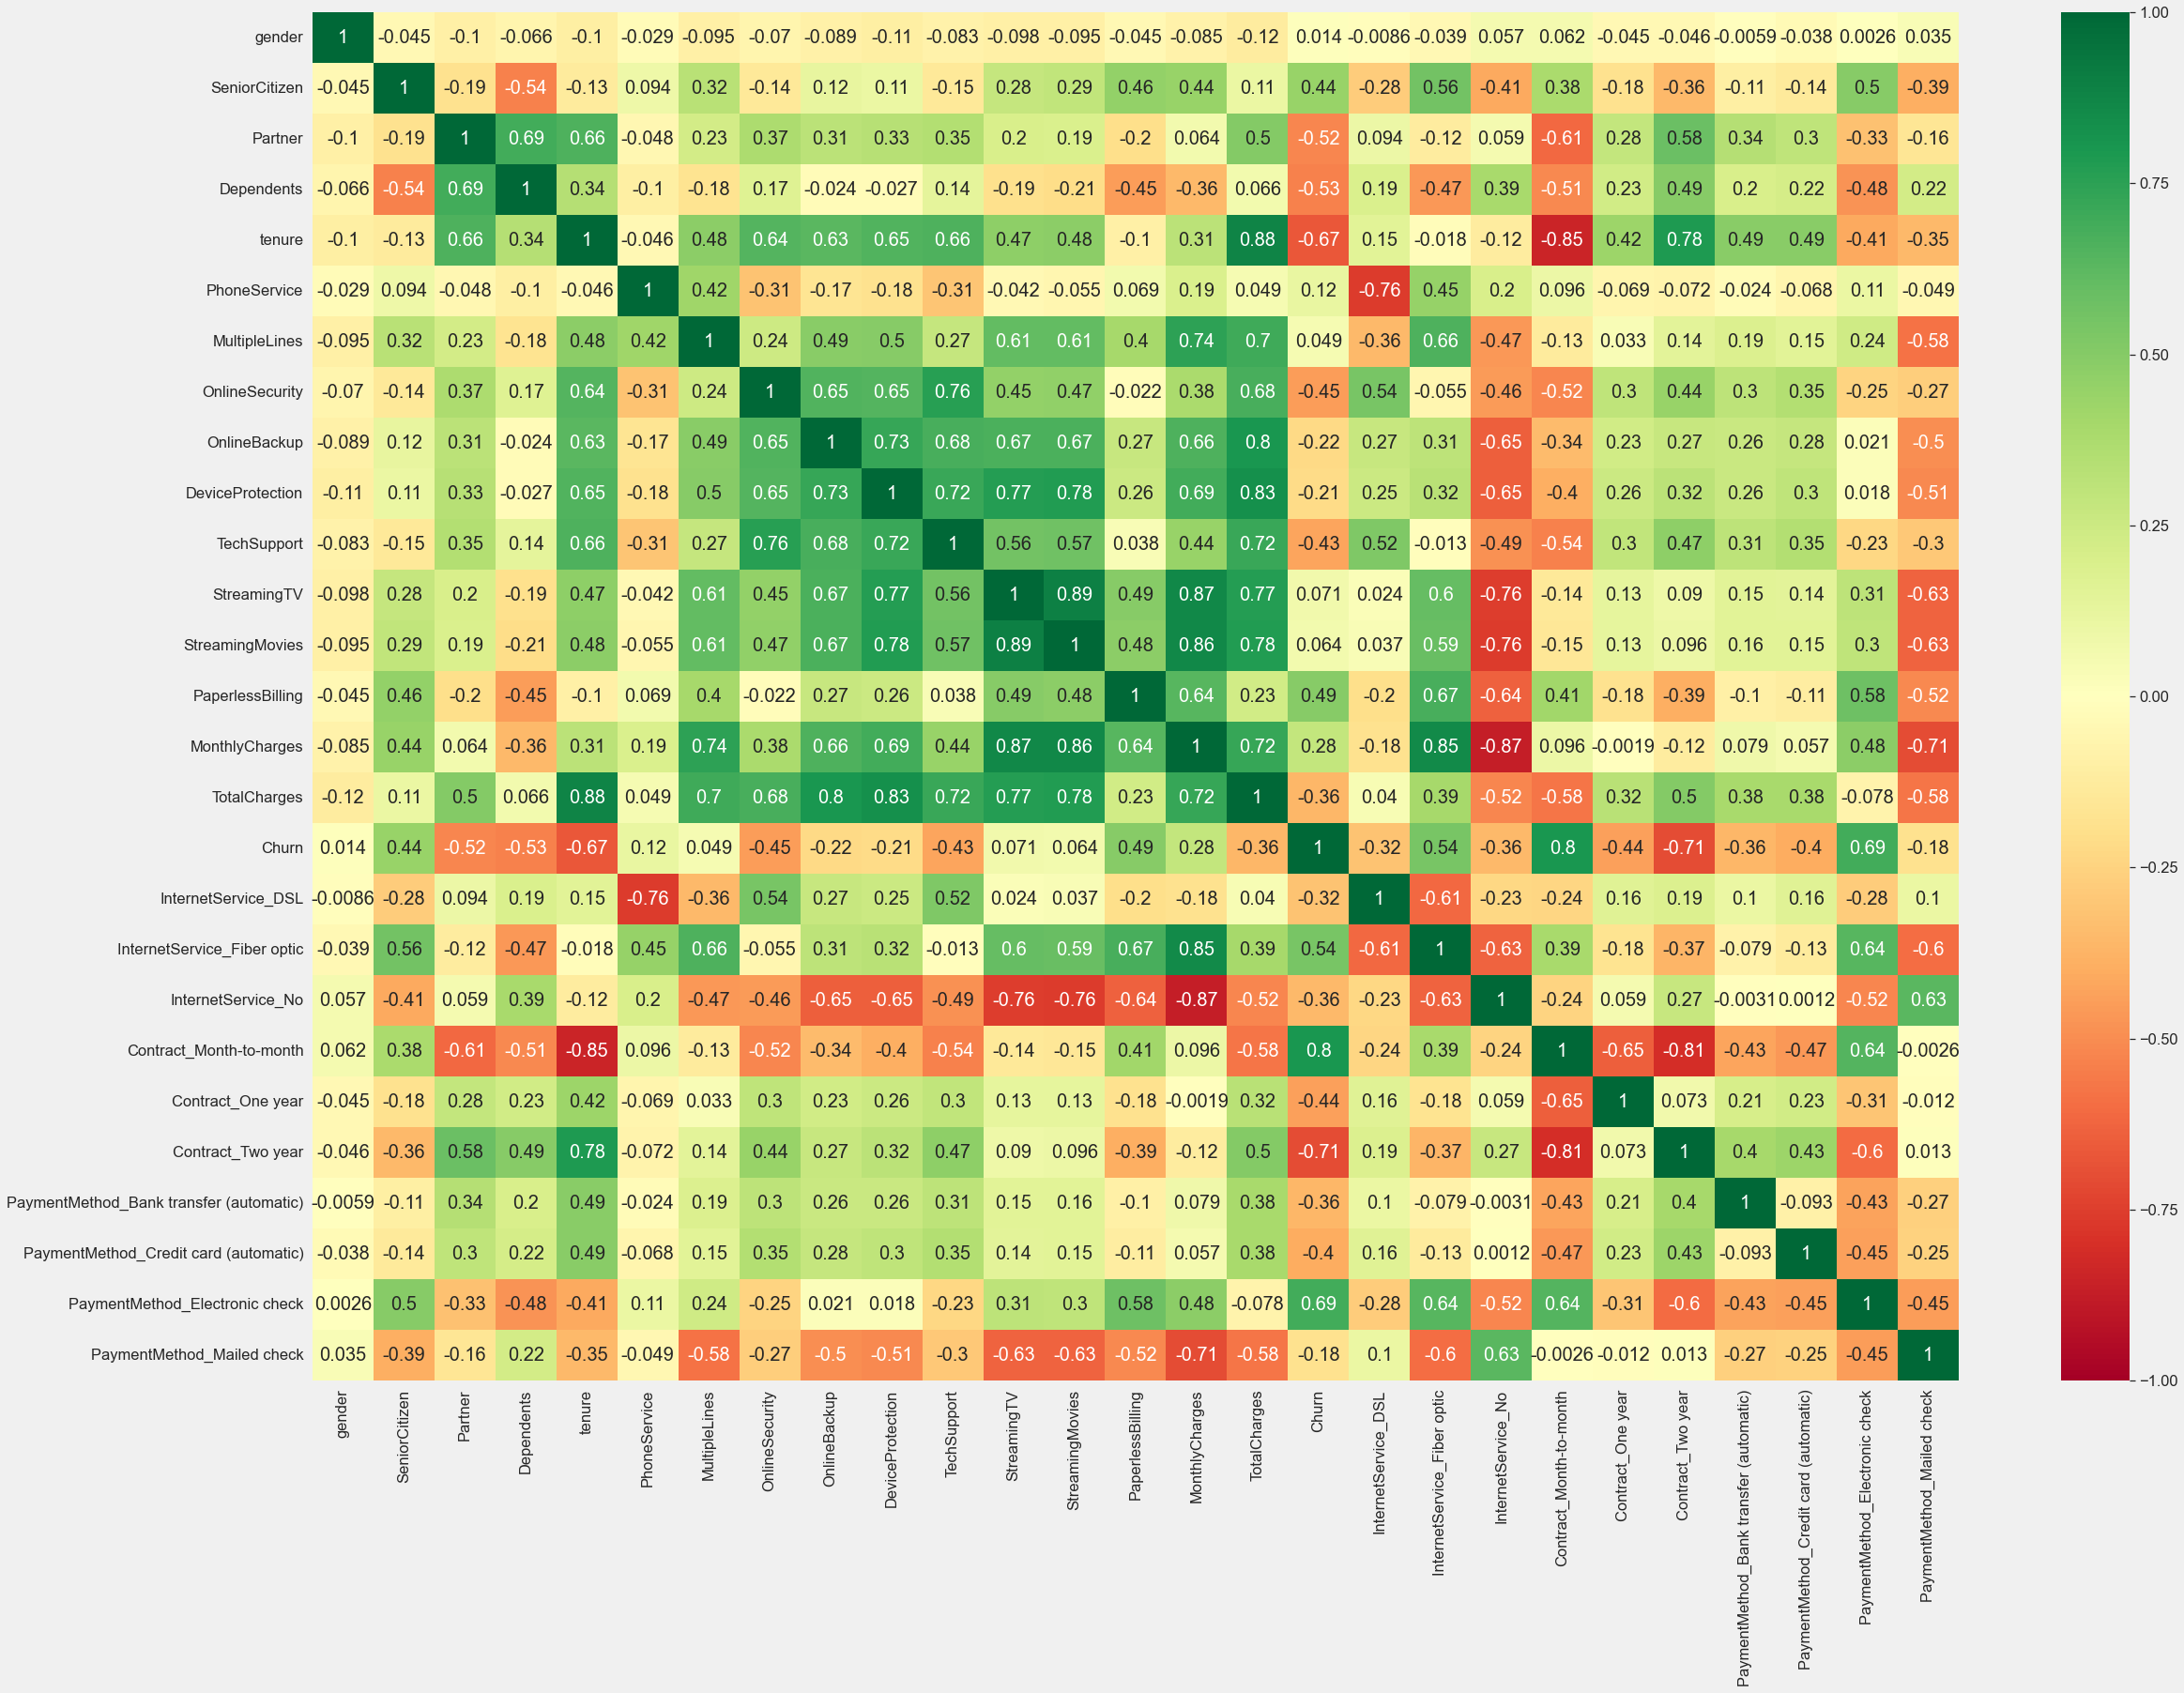

In [43]:
import matplotlib.style as style
style.use('fivethirtyeight')
plt.figure(figsize=(35,25))
sns.set(font_scale=1.5)
#sns.heatmap(new_data.corr(), cmap="YlGnBu", annot=True)
sns.heatmap(new_data.corr(), cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 20})

### Derived Insight:
High Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seen in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn



## Feature engineering

In [44]:
data3= data2_dummies.copy(deep=True)

In [45]:
#Normalizing our data using minmax scaler

#from sklearn.preprocessing import MinMaxScaler
#scl_features=['tenure','MonthlyCharges','TotalCharges']

#fit_transform first transfroms the data by computing mean and sd and then scale the data
#data3[scl_features] = MinMaxScaler().fit_transform(data3[scl_features])



In [46]:
data3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


### Dividing into X and Y sets for the model building¶

In [47]:
#let X contains all the features and y, target variable
X= data3.drop('Churn', axis=1)
y= data3['Churn']

### Train and Test splitting

In [48]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (4930, 26)
y_train (4930,)
X_test (2113, 26)
y_test (2113,)


### Create a generalized function to calculate the metrics for the test set.

In [49]:
def get_test_report(model):
    
    # return the performace measures on test set
    return(classification_report(y_test, y_pred))

In [50]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [51]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve for Heart Disease Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred),4)))

    # plot the grid
    plt.grid(True)

In [52]:
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'f1-score'])

# append the result table for all performance scores
# performance measures considered for comparision are 'AUC', 'Precision', 'Recall','Accuracy','Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

<a id='mod_build'></a>
# 5. Model Building

In [53]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', random_state = 10)

# fit the model using fit() on train data
decision_tree_model = decision_tree.fit(X_train, y_train)

In [54]:
y_pred = decision_tree_model.predict(X_test)

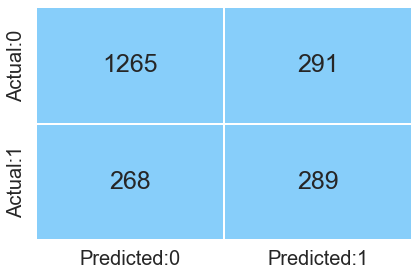

In [55]:
plot_confusion_matrix(decision_tree_model)


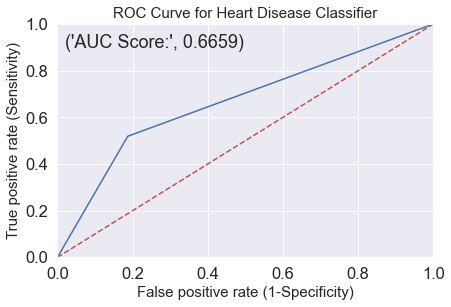

In [56]:
plot_roc(decision_tree_model)

In [57]:
test_report = get_test_report(decision_tree_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1556
           1       0.50      0.52      0.51       557

    accuracy                           0.74      2113
   macro avg       0.66      0.67      0.66      2113
weighted avg       0.74      0.74      0.74      2113



### We observe that our data is imbalaced between the 2 classes of the target variable. Let's use SMOTE technique to treat the imbalanced data

In [58]:
! pip install -U imbalanced-learn

In [70]:
# # SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=40)
X_resampled,y_resampled= sm.fit_resample(X,y)


In [71]:
counter=Counter(y)
print(counter)

Counter({0: 5174, 1: 1869})


In [61]:
Xr_train,Xr_test,yr_train,yr_test=train_test_split(X_resampled,y_resampled, test_size=0.30)


In [62]:
smote=DecisionTreeClassifier(criterion = 'gini', random_state = 10)

# fit the model using fit() on train data
smote_model = smote.fit(Xr_train, yr_train)

In [63]:
y_pred_smote = smote_model.predict(Xr_test)

In [64]:
smote_test_report = get_test_report(smote_model)
print(smote_test_report)


              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1556
           1       0.50      0.52      0.51       557

    accuracy                           0.74      2113
   macro avg       0.66      0.67      0.66      2113
weighted avg       0.74      0.74      0.74      2113



In [65]:
from collections import Counter
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state=40)
X_resampled,y_resampled= sm.fit_resample(X,y)


In [66]:
Xr1_train,Xr1_test,yr1_train,yr1_test=train_test_split(X_resampled,y_resampled, test_size=0.30)

In [67]:
smote1=DecisionTreeClassifier(criterion = 'gini', random_state = 10)

# fit the model using fit() on train data
smote1_model = smote.fit(Xr1_train, yr1_train)

In [68]:
y_pred_smote1 = smote1_model.predict(Xr1_test)

In [69]:
smote1_test_report = get_test_report(smote_model)
print(smote_test_report)


              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1556
           1       0.50      0.52      0.51       557

    accuracy                           0.74      2113
   macro avg       0.66      0.67      0.66      2113
weighted avg       0.74      0.74      0.74      2113

